<a href="https://colab.research.google.com/github/Mario2216/API/blob/main/Mario_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset cargado correctamente.
Filas: 506, Columnas: 13

Primeras filas del dataset:


,Tasa_Crimen,Zona_Residencial,Industrial,Cerca_Rio,Contaminacion_NOX,Promedio_Habitaciones,Edad_Vivienda,Distancia_Centro,Indice_Accesibilidad_Radial,Impuesto_Propiedad,Ratio_Alumnos_Porfesor,Proporcion_Afroamericanos,Porcentaje_Bajos_Ingresos
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



Descripción estadística:


,Tasa_Crimen,Zona_Residencial,Industrial,Cerca_Rio,Contaminacion_NOX,Promedio_Habitaciones,Edad_Vivienda,Distancia_Centro,Indice_Accesibilidad_Radial,Impuesto_Propiedad,Ratio_Alumnos_Porfesor,Proporcion_Afroamericanos,Porcentaje_Bajos_Ingresos
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000



--- Evaluación del modelo ---
Error cuadrático medio (MSE): 24.29
Coeficiente de determinación (R²): 0.67


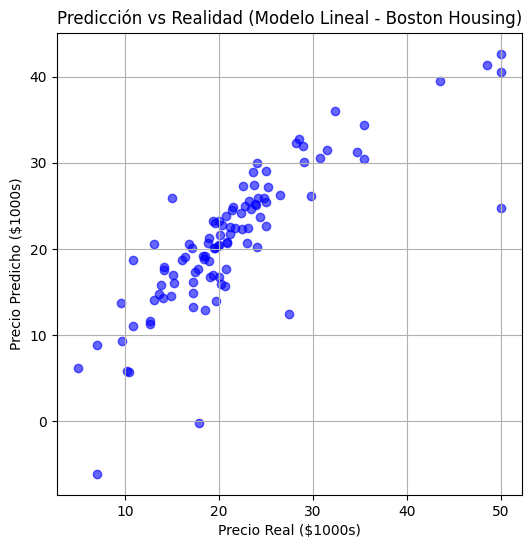


Coeficientes del modelo:


,Coeficiente
Tasa_Crimen,-0.113056
Zona_Residencial,0.030110
Industrial,0.040381
Cerca_Rio,2.784438
Contaminacion_NOX,-17.202633
Promedio_Habitaciones,4.438835
Edad_Vivienda,-0.006296
Distancia_Centro,-1.447865
Indice_Accesibilidad_Radial,0.262430
Impuesto_Propiedad,-0.010647


In [1]:



# LAB: Modelo Lineal para Predicción de Precios de Casas en Boston

# Fue retirado de scikit-learn debido a una variable con sesgo racial.
# Fuente original: http://lib.stat.cmu.edu/datasets/boston

# 1️⃣ Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ==========================================
# 2️⃣ Cargar el dataset desde la fuente original
# ==========================================
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Usamos una cadena raw (r"") para evitar advertencias con '\s'
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# El dataset viene en pares de filas, por lo que lo reestructuramos
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Crear DataFrame
columns = [
"Tasa_Crimen",         # CRIM
    "Zona_Residencial",    # ZN
    "Industrial",          # INDUS
    "Cerca_Rio",           # CHAS
    "Contaminacion_NOX",   # NOX
    "Promedio_Habitaciones",# RM
    "Edad_Vivienda",       # AGE
    "Distancia_Centro",    # DIS
    "Indice_Accesibilidad_Radial", # RAD
    "Impuesto_Propiedad",  # TAX
    "Ratio_Alumnos_Porfesor", # PTRATIO
    "Proporcion_Afroamericanos", # B
    "Porcentaje_Bajos_Ingresos"  # LSTAT
]
X = pd.DataFrame(data, columns=columns)
y = pd.Series(target, name="PRICE")

print("✅ Dataset cargado correctamente.")
print(f"Filas: {X.shape[0]}, Columnas: {X.shape[1]}")

# ==========================================
# 3️⃣ Exploración básica
# ==========================================
print("\nPrimeras filas del dataset:")
display(X.head())

print("\nDescripción estadística:")
display(X.describe())

# ==========================================
# 4️⃣ Dividir datos en entrenamiento y prueba
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 5️⃣ Crear y entrenar el modelo lineal
# ==========================================
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# ==========================================
# 6️⃣ Evaluar el modelo
# ==========================================
y_pred = modelo.predict(X_test)

print("\n--- Evaluación del modelo ---")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

# ==========================================
# 7️⃣ Visualización de resultados
# ==========================================
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Precio Real ($1000s)")
plt.ylabel("Precio Predicho ($1000s)")
plt.title("Predicción vs Realidad (Modelo Lineal - Boston Housing)")
plt.grid(True)
plt.show()

# ==========================================
# 8️⃣ Mostrar coeficientes del modelo
# ==========================================
coeficientes = pd.DataFrame(modelo.coef_, index=X.columns, columns=["Coeficiente"])
print("\nCoeficientes del modelo:")
display(coeficientes)

✅ Dataset cargado correctamente.
Filas: 506, Columnas: 13

Primeras filas del dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



Descripción estadística:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000



--- Evaluación del modelo ---
Error cuadrático medio (MSE): 24.29
Coeficiente de determinación (R²): 0.67


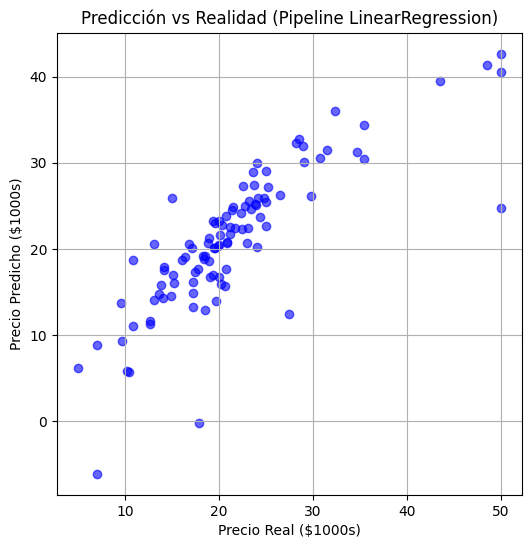


Coeficientes del modelo:


,Coeficiente
CRIM,-1.002135
ZN,0.696269
INDUS,0.278065
CHAS,0.718738
NOX,-2.022319
RM,3.145240
AGE,-0.176048
DIS,-3.081908
RAD,2.251407
TAX,-1.767014


In [ ]:
# ============================================================
# LAB: Modelo Lineal para Predicción de Precios de Casas en Boston
# ============================================================
# ⚠️ Nota Importante:
# Este dataset se utiliza únicamente con fines educativos.
# Fue retirado de scikit-learn debido a la presencia de una variable
# (B, proporción de afroamericanos por ciudad) que puede inducir sesgo racial.
# scikit-learn para la regresión lineal y la evaluación, pero podemos reforzar su uso incluyendo pipeline y escalado de variables
#
# Fuente original: http://lib.stat.cmu.edu/datasets/boston
# ============================================================

# 1️⃣ Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# ============================================================
# 2️⃣ Cargar el dataset desde la fuente original
# ============================================================
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# Reestructurar datos
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

X = pd.DataFrame(data, columns=columns)
y = pd.Series(target, name="PRICE")

print("✅ Dataset cargado correctamente.")
print(f"Filas: {X.shape[0]}, Columnas: {X.shape[1]}")

# ============================================================
# 3️⃣ Exploración básica
# ============================================================
print("\nPrimeras filas del dataset:")
display(X.head())

print("\nDescripción estadística:")
display(X.describe())

# ============================================================
# 4️⃣ Dividir datos en entrenamiento y prueba
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================================
# 5️⃣ Crear un pipeline con escalado y regresión lineal
# ============================================================
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Escalado de variables
    ('regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

# ============================================================
# 6️⃣ Evaluar el modelo
# ============================================================
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n--- Evaluación del modelo ---")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

# ============================================================
# 7️⃣ Visualización de resultados
# ============================================================
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Precio Real ($1000s)")
plt.ylabel("Precio Predicho ($1000s)")
plt.title("Predicción vs Realidad (Pipeline LinearRegression)")
plt.grid(True)
plt.show()

# ============================================================
# 8️⃣ Coeficientes del modelo
# ============================================================
coeficientes = pd.DataFrame(
    pipeline.named_steps['regression'].coef_,
    index=X.columns,
    columns=["Coeficiente"]
)
print("\nCoeficientes del modelo:")
display(coeficientes)

# ⚠️ Nota: La variable 'B' puede inducir sesgo racial, por lo que
# no debería usarse en aplicaciones reales de predicción.
